In [1]:
# MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from textblob import TextBlob

## Set up your tools

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

# Helper Functions


## LSTM NN functions

In [4]:
def build_lstm_model(input_shape, learning_rate=0.001):
  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50))
  model.add(Dropout(0.2))
  model.add(Dense(units=1))

  optimizer = Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='mean_squared_error')
  return model

def prepare_data_for_lstm(df, feature_columns, target_column, test_size=0.2, random_state=42):
  X = df[feature_columns].values
  y = df[target_column].values

  scaler = MinMaxScaler()

  X = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

  input_shape = (X_train.shape[1], 1)
  X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1])
  X_test = X_test.reshape(X_test.shape[0], input_shape[0], input_shape[1])

  return X_train, X_test, y_train, y_test, scaler

def train_lstm_model(X_train, y_train, input_shape1, input_shape2, epochs=10, batch_size=32):
  input_shape = (input_shape1, input_shape2)
  model = build_lstm_model(input_shape)
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
  return model

def evaluate_model(model, X_test, y_test):
  predictions = model.predict(X_test)

  mse = mean_squared_error(y_test, predictions)
  mae = mean_absolute_error(y_test, predictions)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, predictions)

  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  return mae, mse, rmse, r2, mape

## Visualizations

In [5]:
def plot_sentiment_vs_price(df, sentiment_col, price_change_col, title, sentiment_label='Sentiment', price_change_label='Percent Price Change'):
  fig, ax1 = plt.subplots(figsize=(10, 6))

  ax1.set_xlabel('Time')
  ax1.set_ylabel(sentiment_label, color='tab:blue')
  ax1.plot(df['Publication Date'], df[sentiment_col], color='tab:blue', label=sentiment_label)
  ax1.tick_params(axis='y', labelcolor='tab:blue')
  ax1.legend(loc='upper left')

  ax2 = ax1.twinx()
  ax2.set_ylabel(price_change_label, color='tab:red')
  ax2.plot(df['Publication Date'], df[price_change_col], color='tab:red', label=price_change_label)
  ax2.tick_params(axis='y', labelcolor='tab:red')
  ax2.legend(loc='upper right')

  plt.title(title)
  fig.tight_layout()
  plt.show()

def plot_scatter_sentiment_vs_price_change(df, sentiment_column, price_change_column, title):
    plt.figure(figsize=(10, 6))

    sentiment = df[sentiment_column]
    price_change = df[price_change_column]

    plt.scatter(sentiment, price_change, alpha=0.5)

    plt.xlabel(sentiment_column)
    plt.ylabel(price_change_column)
    plt.title(title)
    plt.show()

def plot_colored_scatter_sentiment_vs_price_change(df, sentiment_col, price_change_col, color_col, title):
    plt.figure(figsize=(10, 6))

    sentiment = df[sentiment_col]
    price_change = df[price_change_col]
    colors = df[color_col]

    plt.scatter(sentiment, price_change, c=colors, alpha=0.7)

    plt.xlabel(sentiment_col)
    plt.ylabel(price_change_col)
    plt.title(title)

    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

    plt.show()

# Load data into dataframes


## Paths

In [6]:
# store paths to data
path_to_apple_newsStock_data = '/content/drive/Shareddrives/econ470 group presentation/datasets/final_data/apple_final.csv'
path_to_ed_newsStock_data = '/content/drive/Shareddrives/econ470 group presentation/datasets/final_data/ed_final.csv'
path_to_ip_newsStock_data = '/content/drive/Shareddrives/econ470 group presentation/datasets/final_data/ip_final.csv'
path_to_levi_newsStock_data = '/content/drive/Shareddrives/econ470 group presentation/datasets/final_data/levi_final.csv'
path_to_pm_newsStock_data = '/content/drive/Shareddrives/econ470 group presentation/datasets/final_data/pm_final.csv'
path_to_ubs_newsStock_data = '/content/drive/Shareddrives/econ470 group presentation/datasets/final_data/ubs_final.csv'

## DFs

In [8]:
# load DFs
df_apple_newsStock_data = pd.read_csv(path_to_apple_newsStock_data)
df_ed_newsStock_data = pd.read_csv(path_to_ed_newsStock_data)
df_ip_newsStock_data = pd.read_csv(path_to_ip_newsStock_data)
df_levi_newsStock_data = pd.read_csv(path_to_levi_newsStock_data)
df_pm_newsStock_data = pd.read_csv(path_to_pm_newsStock_data)
df_ubs_newsStock_data = pd.read_csv(path_to_ubs_newsStock_data)

df_list = [df_apple_newsStock_data, df_ed_newsStock_data, df_ip_newsStock_data, df_levi_newsStock_data, df_pm_newsStock_data, df_ubs_newsStock_data]
df_all_companies = pd.concat(df_list, ignore_index=True)
df_list = [df_all_companies]
df_all_companies

,Date,Ticker,1_day,2_day,3_day,4_day,5_day,Publication Date,sentiment
0,2019-11-04,AAPL,0.656711,3.513416,5.853822,5.840767,3.392897,2019-11-04,0.043880
1,2020-02-19,AAPL,1.448264,-0.409293,-0.384777,-1.094143,1.254638,2020-02-19,0.207843
2,2022-06-29,AAPL,1.302391,-1.715367,-1.715367,0.694298,2.866650,2022-06-29,0.120626
3,2023-01-03,AAPL,-3.740480,-3.502820,-0.769602,-3.814507,-5.149401,2023-01-03,0.074007
4,2023-01-04,AAPL,1.031428,-2.747632,-2.507521,0.253888,-2.822423,2023-01-04,0.065718
...,...,...,...,...,...,...,...,...,...
1674,2023-10-10,UBS,0.365548,0.487999,2.616275,3.173269,3.605866,2023-10-10,0.048863
1675,2023-10-11,UBS,2.104415,2.477656,2.602684,4.775748,5.344463,2023-10-11,0.059543
1676,2023-10-12,UBS,-1.743952,0.323764,0.690496,0.813343,2.948509,2023-10-12,0.055094
1677,2023-10-13,UBS,-1.936273,-3.646457,-1.618778,-1.259147,-1.138678,2023-10-13,0.062566


In [ ]:
new_column_names = {'1_day': 'StockPrice_PercentChangeAfter_1Days',
                    '2_day': 'StockPrice_PercentChangeAfter_2Days',
                    '3_day': 'StockPrice_PercentChangeAfter_3Days',
                    '4_day': 'StockPrice_PercentChangeAfter_4Days',
                    '5_day': 'StockPrice_PercentChangeAfter_5Days',
                    'sentiment': 'Sentiment_onPubDate'}

for df in df_list:
  df.rename(columns=new_column_names, inplace=True)

# Drop rows with NaN values
for df in df_list:
  df.dropna(inplace=True)

Here is the list of columns we can work with now at the end of our Data phase:

In [ ]:
df_all_companies.columns

Index(['Date', 'Ticker', 'StockPrice_PercentChangeAfter_1Days',
       'StockPrice_PercentChangeAfter_2Days',
       'StockPrice_PercentChangeAfter_3Days',
       'StockPrice_PercentChangeAfter_4Days',
       'StockPrice_PercentChangeAfter_5Days', 'Publication Date',
       'Sentiment_onPubDate'],
      dtype='object')

# Models

## train test split - Regression Models

In [ ]:
# Regression Models to predict stock price percent change after 1 day for each company
all_1day_X_train, all_1day_X_test, all_1day_y_train, all_1day_y_test, scaler_daily = prepare_data_for_lstm(
    df_all_companies, ['Sentiment_onPubDate'], 'StockPrice_PercentChangeAfter_1Days')

# Regression Models to predict stock price percent change after 2 day for each company
all_2day_X_train, all_2day_X_test, all_2day_y_train, all_2day_y_test, scaler_daily = prepare_data_for_lstm(
    df_all_companies, ['Sentiment_onPubDate'], 'StockPrice_PercentChangeAfter_2Days')

# Regression Models to predict stock price percent change after 3 day for each company
all_3day_X_train, all_3day_X_test, all_3day_y_train, all_3day_y_test, scaler_daily = prepare_data_for_lstm(
    df_all_companies, ['Sentiment_onPubDate'], 'StockPrice_PercentChangeAfter_3Days')

# Regression Models to predict stock price percent change after 4 day for each company
all_4day_X_train, all_4day_X_test, all_4day_y_train, all_4day_y_test, scaler_daily = prepare_data_for_lstm(
    df_all_companies, ['Sentiment_onPubDate'], 'StockPrice_PercentChangeAfter_4Days')

# Regression Models to predict stock price percent change after 5 day for each company
all_5day_X_train, all_5day_X_test, all_5day_y_train, all_5day_y_test, scaler_daily = prepare_data_for_lstm(
    df_all_companies, ['Sentiment_onPubDate'], 'StockPrice_PercentChangeAfter_5Days')

## Train and Evaluate Regression Models





In [ ]:
all_1day_regression_model = train_lstm_model(all_1day_X_train, all_1day_y_train, (all_1day_X_train.shape[1]), (all_1day_X_train.shape[2]))
all_2day_regression_model = train_lstm_model(all_2day_X_train, all_2day_y_train, (all_2day_X_train.shape[1]), (all_2day_X_train.shape[2]))
all_3day_regression_model = train_lstm_model(all_3day_X_train, all_3day_y_train, (all_3day_X_train.shape[1]), (all_3day_X_train.shape[2]))
all_4day_regression_model = train_lstm_model(all_4day_X_train, all_4day_y_train, (all_4day_X_train.shape[1]), (all_4day_X_train.shape[2]))
all_5day_regression_model = train_lstm_model(all_5day_X_train, all_5day_y_train, (all_5day_X_train.shape[1]), (all_5day_X_train.shape[2]))
all_1day_mae, all_1day_mse, all_1day_rmse, all_1day_r2, all_1day_mape = evaluate_model(all_1day_regression_model, all_1day_X_test, all_1day_y_test)
all_2day_mae, all_2day_mse, all_2day_rmse, all_2day_r2, all_2day_mape = evaluate_model(all_2day_regression_model, all_2day_X_test, all_2day_y_test)
all_3day_mae, all_3day_mse, all_3day_rmse, all_3day_r2, all_3day_mape = evaluate_model(all_3day_regression_model, all_3day_X_test, all_3day_y_test)
all_4day_mae, all_4day_mse, all_4day_rmse, all_4day_r2, all_4day_mape = evaluate_model(all_4day_regression_model, all_4day_X_test, all_4day_y_test)
all_5day_mae, all_5day_mse, all_5day_rmse, all_5day_r2, all_5day_mape = evaluate_model(all_5day_regression_model, all_5day_X_test, all_5day_y_test)

Epoch 1/10
42/42 [==============================] - 5s 6ms/step - loss: 5.3332
Epoch 2/10
42/42 [==============================] - 0s 5ms/step - loss: 5.3336
Epoch 3/10
42/42 [==============================] - 0s 6ms/step - loss: 5.3317
Epoch 4/10
42/42 [==============================] - 0s 6ms/step - loss: 5.3323
Epoch 5/10
42/42 [==============================] - 0s 6ms/step - loss: 5.3337
Epoch 6/10
42/42 [==============================] - 0s 6ms/step - loss: 5.3309
Epoch 7/10
42/42 [==============================] - 0s 6ms/step - loss: 5.3335
Epoch 8/10
42/42 [==============================] - 0s 6ms/step - loss: 5.3313
Epoch 9/10
42/42 [==============================] - 0s 5ms/step - loss: 5.3307
Epoch 10/10
42/42 [==============================] - 0s 5ms/step - loss: 5.3326
Epoch 1/10
42/42 [==============================] - 6s 8ms/step - loss: 8.8335
Epoch 2/10
42/42 [==============================] - 0s 8ms/step - loss: 8.8335
Epoch 3/10
42/42 [==============================] -

<ipython-input-4-8ae7b5f64349>:43: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100


11/11 [==============================] - 1s 4ms/step


<ipython-input-4-8ae7b5f64349>:43: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100


# Data Visualizations

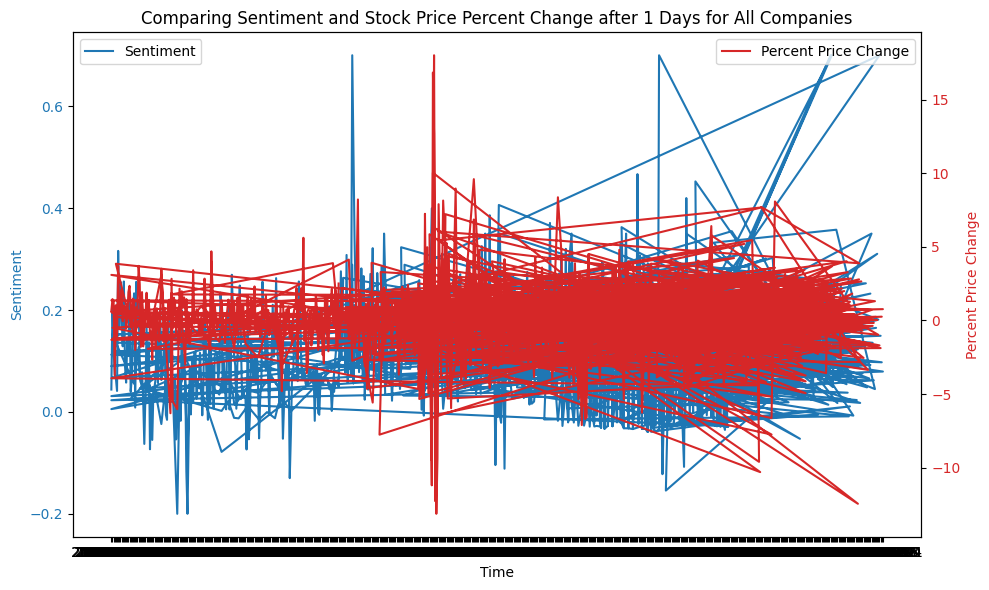

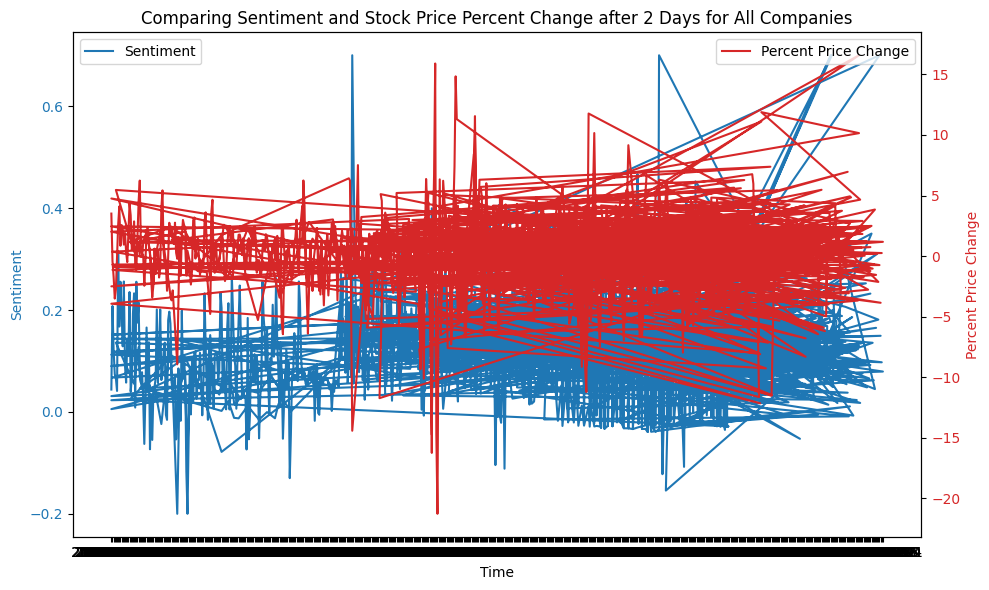

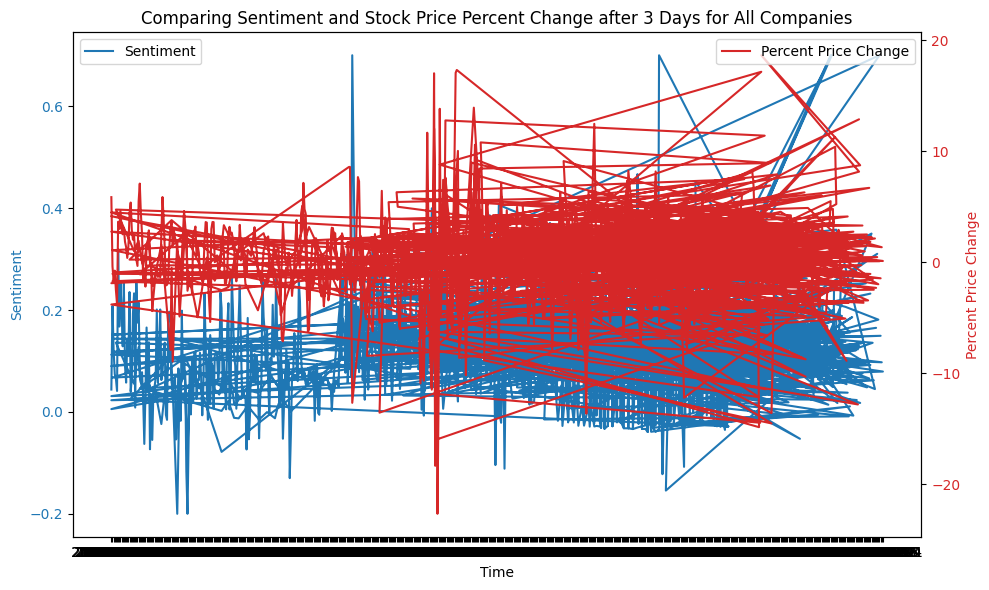

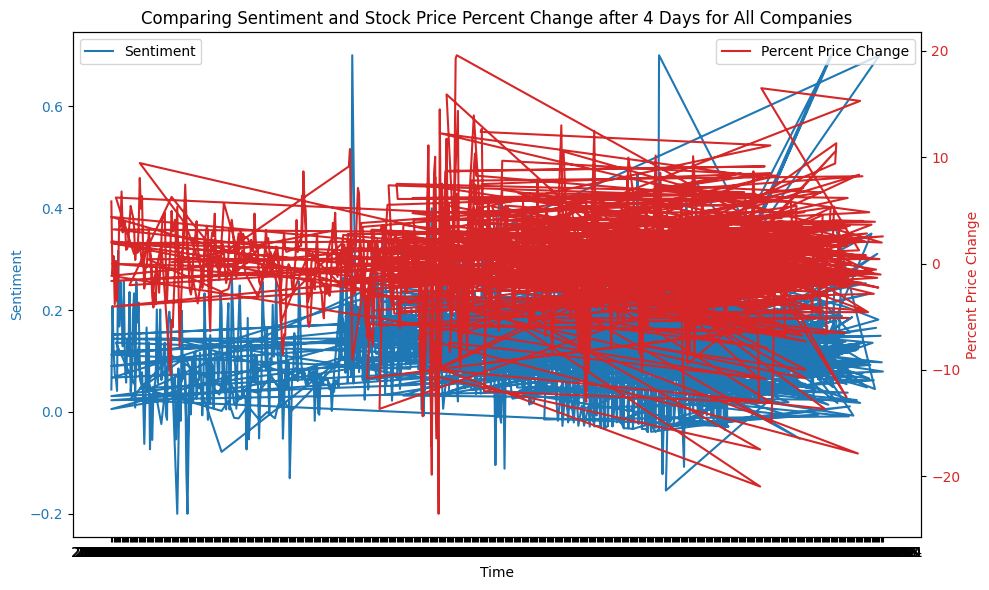

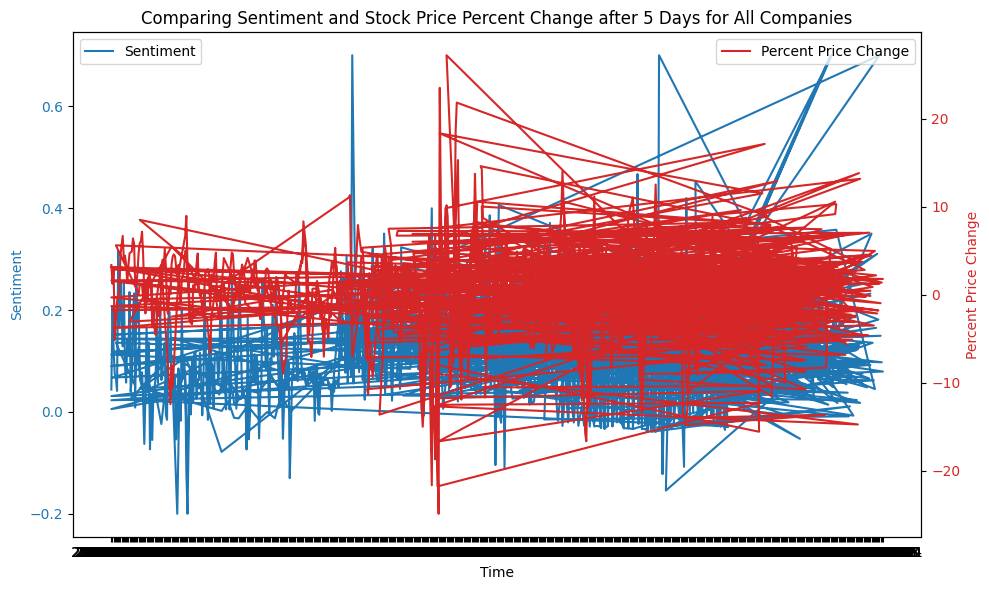

In [ ]:
for df in df_list:
  company_ticker = 'All Companies'
  title = f'Comparing Sentiment and Stock Price Percent Change after 1 Days for {company_ticker}'
  plot_sentiment_vs_price(
      df=df,
      sentiment_col='Sentiment_onPubDate',
      price_change_col='StockPrice_PercentChangeAfter_1Days',
      title=title
  )

for df in df_list:
  company_ticker = 'All Companies'
  title = f'Comparing Sentiment and Stock Price Percent Change after 2 Days for {company_ticker}'
  plot_sentiment_vs_price(
      df=df,
      sentiment_col='Sentiment_onPubDate',
      price_change_col='StockPrice_PercentChangeAfter_2Days',
      title=title
  )

for df in df_list:
  company_ticker = 'All Companies'
  title = f'Comparing Sentiment and Stock Price Percent Change after 3 Days for {company_ticker}'
  plot_sentiment_vs_price(
      df=df,
      sentiment_col='Sentiment_onPubDate',
      price_change_col='StockPrice_PercentChangeAfter_3Days',
      title=title
  )

for df in df_list:
  company_ticker = 'All Companies'
  title = f'Comparing Sentiment and Stock Price Percent Change after 4 Days for {company_ticker}'
  plot_sentiment_vs_price(
      df=df,
      sentiment_col='Sentiment_onPubDate',
      price_change_col='StockPrice_PercentChangeAfter_4Days',
      title=title
  )

for df in df_list:
  company_ticker = 'All Companies'
  title = f'Comparing Sentiment and Stock Price Percent Change after 5 Days for {company_ticker}'
  plot_sentiment_vs_price(
      df=df,
      sentiment_col='Sentiment_onPubDate',
      price_change_col='StockPrice_PercentChangeAfter_5Days',
      title=title
  )

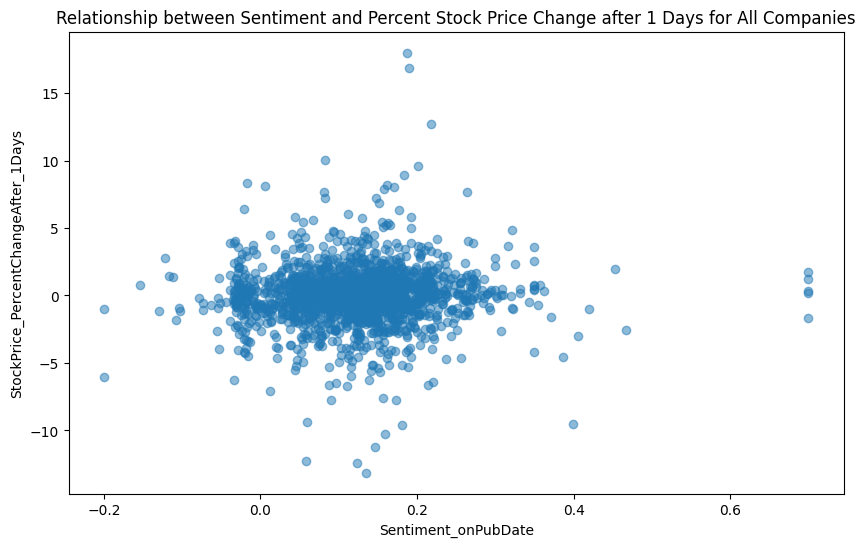

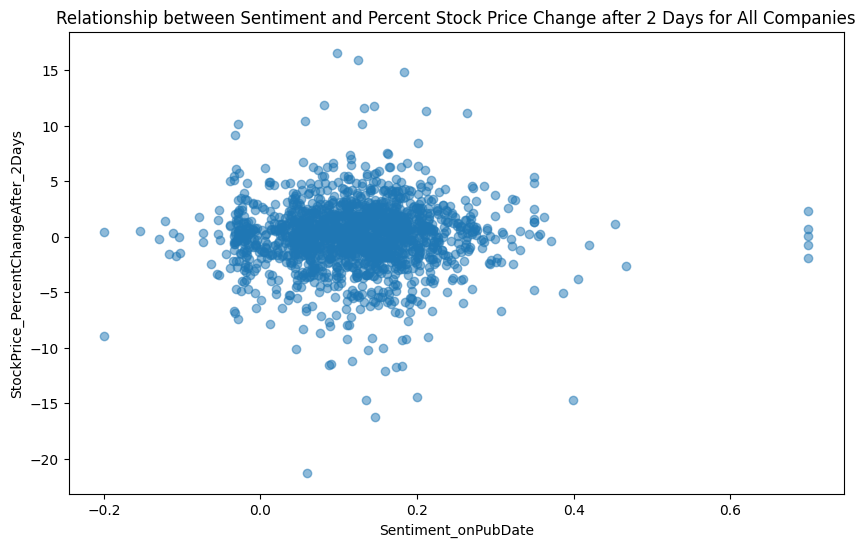

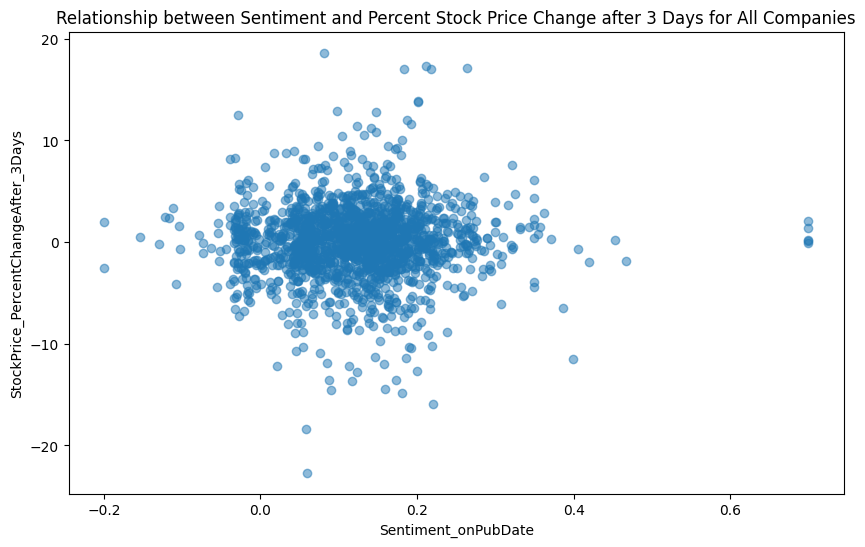

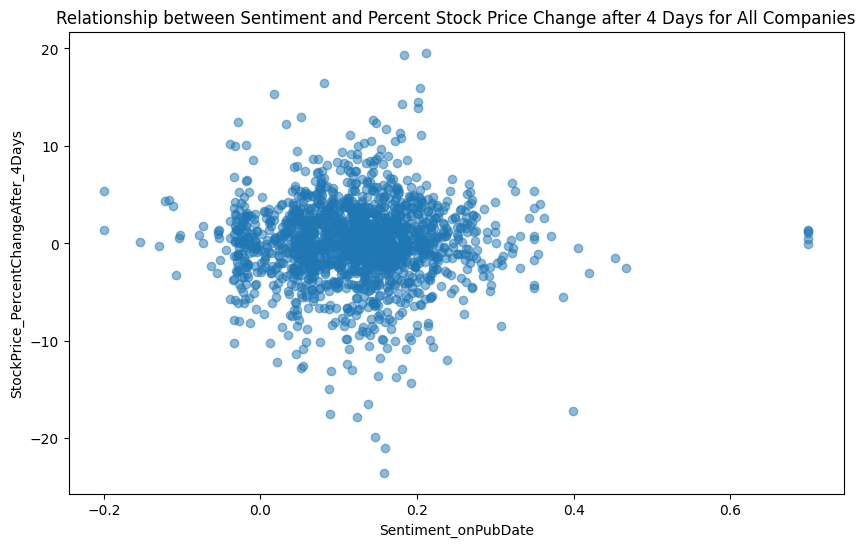

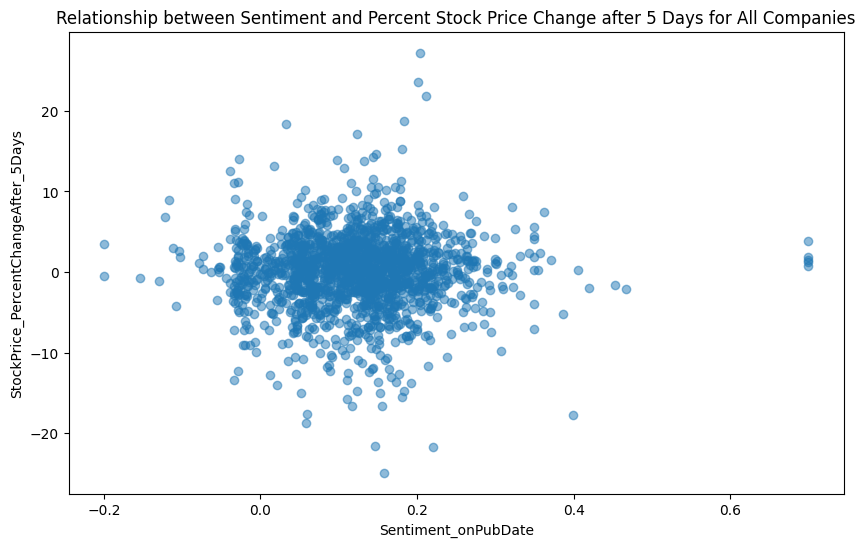

In [ ]:
for df in df_list:
  company_ticker = 'All Companies'
  title = f'Relationship between Sentiment and Percent Stock Price Change after 1 Days for {company_ticker}'
  plot_scatter_sentiment_vs_price_change(
      df,
      'Sentiment_onPubDate',
      'StockPrice_PercentChangeAfter_1Days',
      title
  )

for df in df_list:
  company_ticker = 'All Companies'
  title = f'Relationship between Sentiment and Percent Stock Price Change after 2 Days for {company_ticker}'
  plot_scatter_sentiment_vs_price_change(
      df,
      'Sentiment_onPubDate',
      'StockPrice_PercentChangeAfter_2Days',
      title
  )

for df in df_list:
  company_ticker = 'All Companies'
  title = f'Relationship between Sentiment and Percent Stock Price Change after 3 Days for {company_ticker}'
  plot_scatter_sentiment_vs_price_change(
      df,
      'Sentiment_onPubDate',
      'StockPrice_PercentChangeAfter_3Days',
      title
  )

for df in df_list:
  company_ticker = 'All Companies'
  title = f'Relationship between Sentiment and Percent Stock Price Change after 4 Days for {company_ticker}'
  plot_scatter_sentiment_vs_price_change(
      df,
      'Sentiment_onPubDate',
      'StockPrice_PercentChangeAfter_4Days',
      title
  )

for df in df_list:
  company_ticker = 'All Companies'
  title = f'Relationship between Sentiment and Percent Stock Price Change after 5 Days for {company_ticker}'
  plot_scatter_sentiment_vs_price_change(
      df,
      'Sentiment_onPubDate',
      'StockPrice_PercentChangeAfter_5Days',
      title
  )

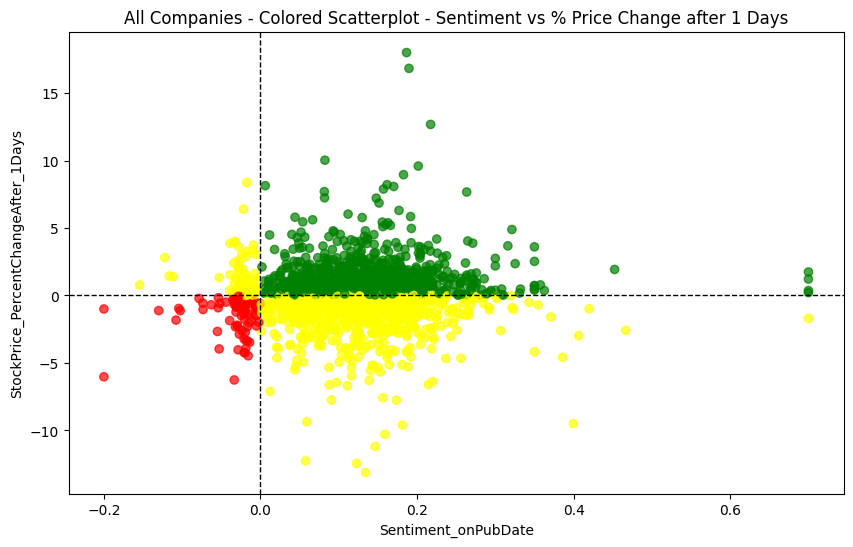

Green:	803	(positive sentiment and positive price change)
Yellow:	795	(mismatch between sentiment and price change)
Red:	81	(negative sentiment and negative price change)


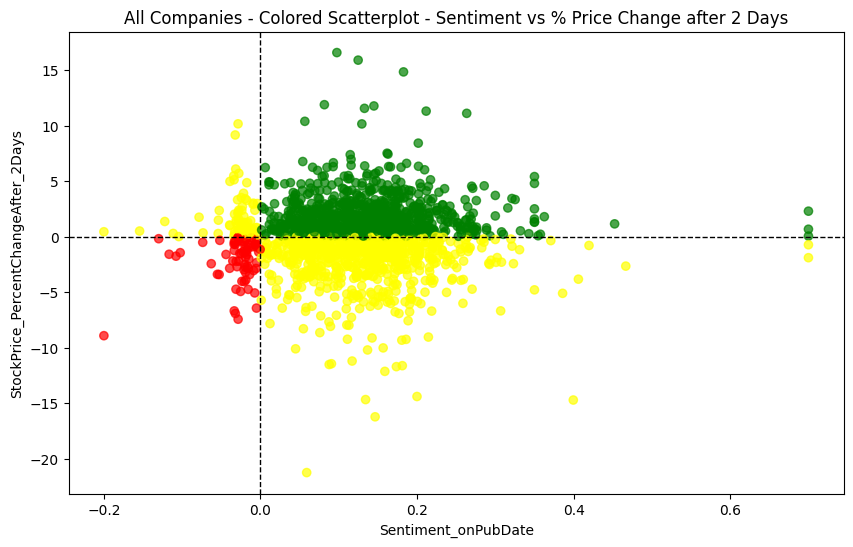

Green:	802	(positive sentiment and positive price change)
Yellow:	804	(mismatch between sentiment and price change)
Red:	73	(negative sentiment and negative price change)


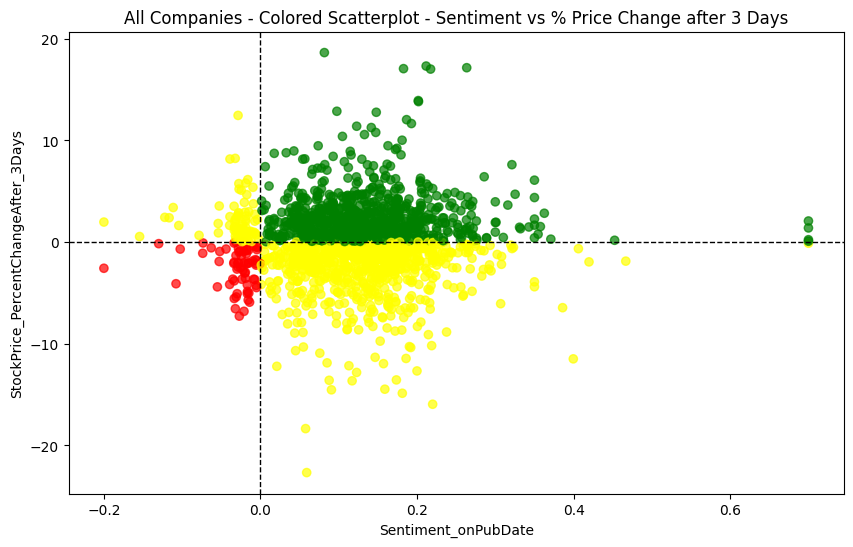

Green:	807	(positive sentiment and positive price change)
Yellow:	803	(mismatch between sentiment and price change)
Red:	69	(negative sentiment and negative price change)


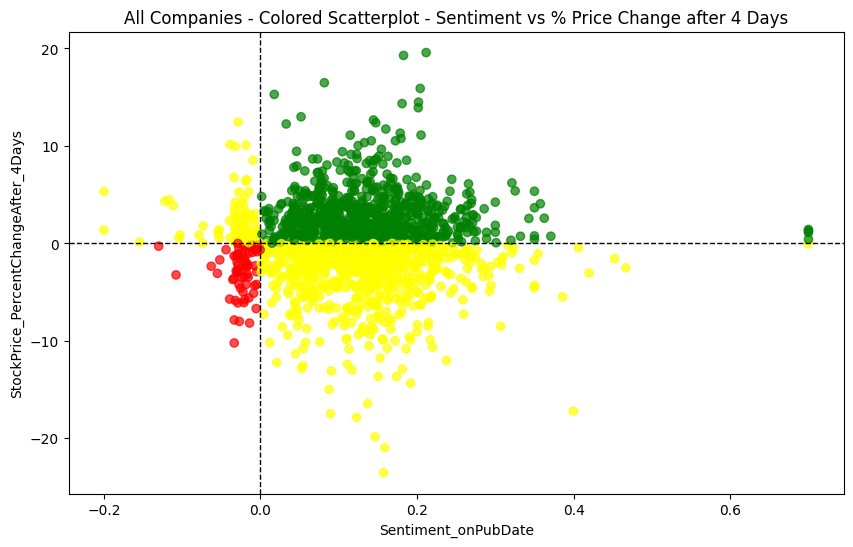

Green:	783	(positive sentiment and positive price change)
Yellow:	829	(mismatch between sentiment and price change)
Red:	67	(negative sentiment and negative price change)


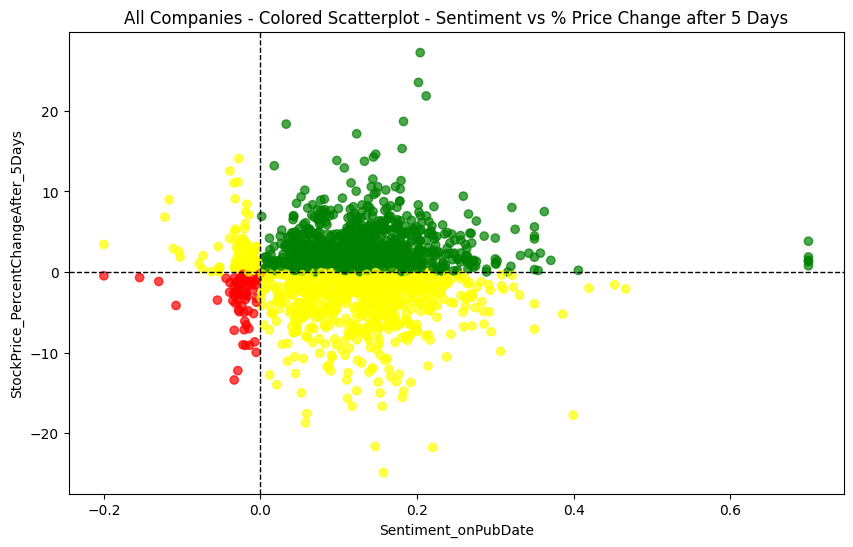

Green:	827	(positive sentiment and positive price change)
Yellow:	783	(mismatch between sentiment and price change)
Red:	69	(negative sentiment and negative price change)


In [ ]:
for df in df_list:
  company_ticker = 'All Companies'

  conditions = [
      (df['Sentiment_onPubDate'] > 0) & (df['StockPrice_PercentChangeAfter_1Days'] > 0),
      (df['Sentiment_onPubDate'] < 0) & (df['StockPrice_PercentChangeAfter_1Days'] < 0)
  ]
  choices = ['green', 'red']
  df['color_1day'] = np.select(conditions, choices, default='yellow')

  title = f'{company_ticker} - Colored Scatterplot - Sentiment vs % Price Change after 1 Days'
  plot_colored_scatter_sentiment_vs_price_change(
      df,
      sentiment_col='Sentiment_onPubDate',
      price_change_col='StockPrice_PercentChangeAfter_1Days',
      color_col='color_1day',
      title=title
  )

  # Count the number of each color
  color_counts = df['color_1day'].value_counts()

  # Print the counts
  print(f"Green:\t{color_counts.get('green', 0)}\t(positive sentiment and positive price change)")
  print(f"Yellow:\t{color_counts.get('yellow')}\t(mismatch between sentiment and price change)")
  print(f"Red:\t{color_counts.get('red', 0)}\t(negative sentiment and negative price change)")

  conditions = [
      (df['Sentiment_onPubDate'] > 0) & (df['StockPrice_PercentChangeAfter_2Days'] > 0),
      (df['Sentiment_onPubDate'] < 0) & (df['StockPrice_PercentChangeAfter_2Days'] < 0)
  ]
  choices = ['green', 'red']
  df['color_2day'] = np.select(conditions, choices, default='yellow')

  title = f'{company_ticker} - Colored Scatterplot - Sentiment vs % Price Change after 2 Days'
  plot_colored_scatter_sentiment_vs_price_change(
      df,
      sentiment_col='Sentiment_onPubDate',
      price_change_col='StockPrice_PercentChangeAfter_2Days',
      color_col='color_2day',
      title=title
  )

  # Count the number of each color
  color_counts = df['color_2day'].value_counts()

  # Print the counts
  print(f"Green:\t{color_counts.get('green', 0)}\t(positive sentiment and positive price change)")
  print(f"Yellow:\t{color_counts.get('yellow')}\t(mismatch between sentiment and price change)")
  print(f"Red:\t{color_counts.get('red', 0)}\t(negative sentiment and negative price change)")

  conditions = [
      (df['Sentiment_onPubDate'] > 0) & (df['StockPrice_PercentChangeAfter_3Days'] > 0),
      (df['Sentiment_onPubDate'] < 0) & (df['StockPrice_PercentChangeAfter_3Days'] < 0)
  ]
  choices = ['green', 'red']
  df['color_3day'] = np.select(conditions, choices, default='yellow')

  title = f'{company_ticker} - Colored Scatterplot - Sentiment vs % Price Change after 3 Days'
  plot_colored_scatter_sentiment_vs_price_change(
      df,
      sentiment_col='Sentiment_onPubDate',
      price_change_col='StockPrice_PercentChangeAfter_3Days',
      color_col='color_3day',
      title=title
  )

  # Count the number of each color
  color_counts = df['color_3day'].value_counts()

  # Print the counts
  print(f"Green:\t{color_counts.get('green', 0)}\t(positive sentiment and positive price change)")
  print(f"Yellow:\t{color_counts.get('yellow')}\t(mismatch between sentiment and price change)")
  print(f"Red:\t{color_counts.get('red', 0)}\t(negative sentiment and negative price change)")

  conditions = [
      (df['Sentiment_onPubDate'] > 0) & (df['StockPrice_PercentChangeAfter_4Days'] > 0),
      (df['Sentiment_onPubDate'] < 0) & (df['StockPrice_PercentChangeAfter_4Days'] < 0)
  ]
  choices = ['green', 'red']
  df['color_4day'] = np.select(conditions, choices, default='yellow')

  title = f'{company_ticker} - Colored Scatterplot - Sentiment vs % Price Change after 4 Days'
  plot_colored_scatter_sentiment_vs_price_change(
      df,
      sentiment_col='Sentiment_onPubDate',
      price_change_col='StockPrice_PercentChangeAfter_4Days',
      color_col='color_4day',
      title=title
  )

  # Count the number of each color
  color_counts = df['color_4day'].value_counts()

  # Print the counts
  print(f"Green:\t{color_counts.get('green', 0)}\t(positive sentiment and positive price change)")
  print(f"Yellow:\t{color_counts.get('yellow')}\t(mismatch between sentiment and price change)")
  print(f"Red:\t{color_counts.get('red', 0)}\t(negative sentiment and negative price change)")

  conditions = [
      (df['Sentiment_onPubDate'] > 0) & (df['StockPrice_PercentChangeAfter_5Days'] > 0),
      (df['Sentiment_onPubDate'] < 0) & (df['StockPrice_PercentChangeAfter_5Days'] < 0)
  ]
  choices = ['green', 'red']
  df['color_5day'] = np.select(conditions, choices, default='yellow')

  title = f'{company_ticker} - Colored Scatterplot - Sentiment vs % Price Change after 5 Days'
  plot_colored_scatter_sentiment_vs_price_change(
      df,
      sentiment_col='Sentiment_onPubDate',
      price_change_col='StockPrice_PercentChangeAfter_5Days',
      color_col='color_5day',
      title=title
  )

  # Count the number of each color
  color_counts = df['color_5day'].value_counts()

  # Print the counts
  print(f"Green:\t{color_counts.get('green', 0)}\t(positive sentiment and positive price change)")
  print(f"Yellow:\t{color_counts.get('yellow')}\t(mismatch between sentiment and price change)")
  print(f"Red:\t{color_counts.get('red', 0)}\t(negative sentiment and negative price change)")

# Model Evaluations

In [ ]:
all_1_day_metrics = (all_1day_mae, all_1day_mse, all_1day_rmse, all_1day_r2, all_1day_mape)
all_2_day_metrics = (all_2day_mae, all_2day_mse, all_2day_rmse, all_2day_r2, all_2day_mape)
all_3_day_metrics = (all_3day_mae, all_3day_mse, all_3day_rmse, all_3day_r2, all_3day_mape)
all_4_day_metrics = (all_4day_mae, all_4day_mse, all_4day_rmse, all_4day_r2, all_4day_mape)
all_5_day_metrics = (all_5day_mae, all_5day_mse, all_5day_rmse, all_5day_r2, all_5day_mape)

metrics_dict = {}
metrics_dict['All Companies'] = (all_1_day_metrics, all_2_day_metrics, all_3_day_metrics, all_4_day_metrics, all_5_day_metrics)

In [ ]:
# List of company tickers and the corresponding dataframes
companies = ['All Companies']

for company_ticker in companies:
    print(f'\n{company_ticker} Regression Metrics:')
    for prediction_day in range(1, 6):
        metrics = metrics_dict[company_ticker][prediction_day - 1]
        mae = metrics[0]
        mse = metrics[1]
        rmse = metrics[2]
        r2 = metrics[3]
        mape = metrics[4]
        print(f'{prediction_day} Days Model Regression Results:')
        print(f'Mean Absolute Error (MAE):\t\t{mae:.4f}')
        print(f'Mean Squared Error (MSE):\t\t{mse:.4f}')
        print(f'Root Mean Squared Error (RMSE)\t\t{rmse:.4f}')
        print(f'Coefficient of Determination (R2):\t{r2:.4f}')
        print(f'Mean Absolute Percentage Error (MAPE):\t{mape:.4f}')
        print("~" * 60)



All Companies Regression Metrics:
1 Days Model Regression Results:
Mean Absolute Error (MAE):		1.4223
Mean Squared Error (MSE):		4.2207
Root Mean Squared Error (RMSE)		2.0544
Coefficient of Determination (R2):	-0.0002
Mean Absolute Percentage Error (MAPE):	inf
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 Days Model Regression Results:
Mean Absolute Error (MAE):		2.1958
Mean Squared Error (MSE):		10.3140
Root Mean Squared Error (RMSE)		3.2115
Coefficient of Determination (R2):	-0.0143
Mean Absolute Percentage Error (MAPE):	102.3501
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
3 Days Model Regression Results:
Mean Absolute Error (MAE):		2.6951
Mean Squared Error (MSE):		15.0940
Root Mean Squared Error (RMSE)		3.8851
Coefficient of Determination (R2):	-0.0044
Mean Absolute Percentage Error (MAPE):	100.8155
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4 Days Model Regression Results:
Mean Absolute Error (MAE):		3.0777
Mean Squared Error (M